In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats.stats import pearsonr
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
import pandas as pd
import seaborn as sns

# Get data

In [2]:
data_array = pd.read_csv('smoke_detection_iot.csv',delimiter=',')

In [3]:
data_array

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [4]:
del data_array["Unnamed: 0"]
data_array

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


# Distribution of data 

In [5]:
variables=["UTC", "Temperature[C]", "Humidity[%]", "TVOC[ppb]", "eCO2[ppm]", "Raw H2", "Raw Ethanol", "Pressure[hPa]", "PM1.0", "PM2.5", "NC0.5", "NC1.0", "NC2.5", "CNT", "Fire Alarm"]

C:\Users\Yuliia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


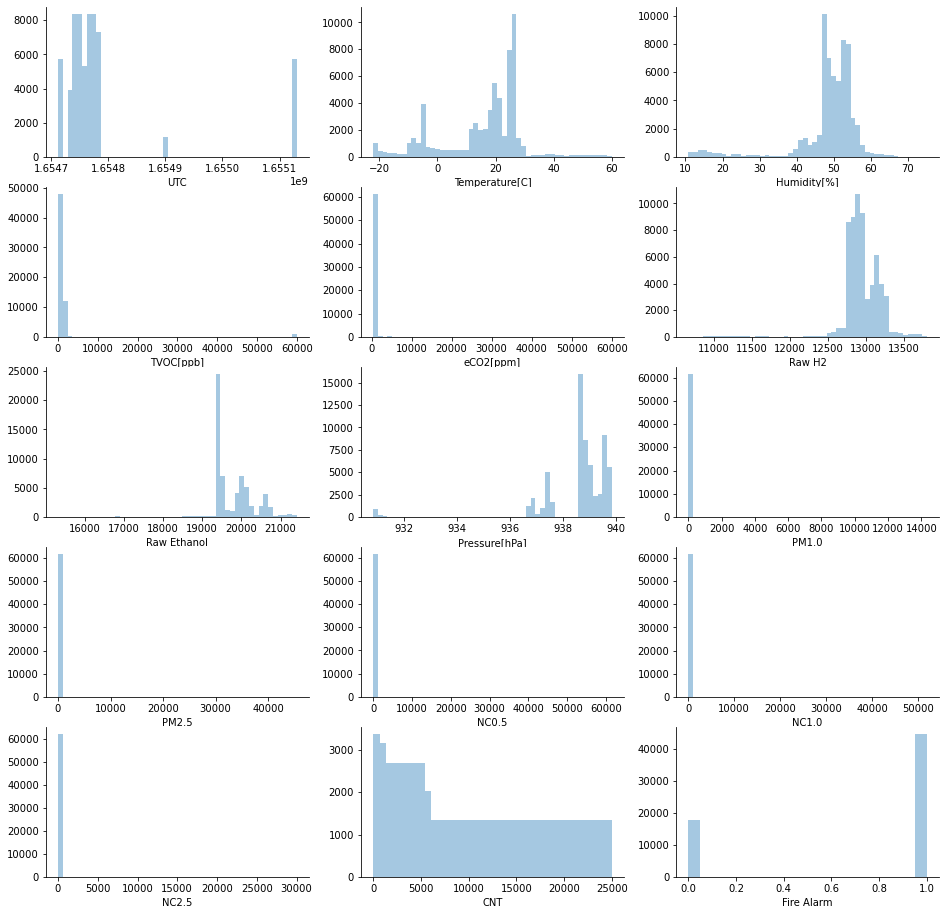

In [6]:
fig, ax = plt.subplots(figsize=(16,16))
for i in range(len(variables)):
    plt.subplot(5,3,i+1)
    x=data_array[variables[i]]
    sns.distplot(x, kde=False)
    sns.despine()

# Find and drop anomalies

In [7]:
var=["TVOC[ppb]", "eCO2[ppm]", "PM1.0", "PM2.5", "NC0.5", "NC1.0", "NC2.5", "Humidity[%]"]
for i in range(len(var)):
    x=var[i]
    q_hi  = data_array[x].quantile(0.95)
    data_array=data_array[data_array[x]<q_hi]

var = ["Humidity[%]", "Raw H2", "Pressure[hPa]", "Raw Ethanol"]
for i in range(len(var)):
    x=var[i]
    q_low  = data_array[x].quantile(0.05)
    data_array=data_array[data_array[x]>q_low]

data_array

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
478,1654733809,25.194,50.02,8,400,12777,19790,939.828,0.10,0.12,0.67,0.126,0.015,478,0
482,1654733813,25.223,49.64,9,400,12779,19792,939.812,0.17,0.19,1.10,0.204,0.024,482,0
483,1654733814,25.230,49.62,3,400,12780,19794,939.827,0.18,0.18,1.21,0.188,0.004,483,0
496,1654733827,25.321,54.76,19,400,12779,19779,939.815,0.25,0.26,1.70,0.265,0.006,496,0
497,1654733828,25.328,55.01,11,400,12776,19772,939.815,0.24,0.25,1.67,0.261,0.006,497,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60568,1655127990,12.101,44.62,0,400,13388,21195,937.448,1.90,1.97,13.07,2.038,0.046,3682,0
60569,1655127991,12.104,44.59,0,400,13406,21235,937.454,1.92,1.99,13.18,2.056,0.046,3683,0
60570,1655127992,12.108,43.82,0,400,13402,21247,937.462,1.93,2.00,13.27,2.069,0.047,3684,0
60571,1655127993,12.112,42.82,0,400,13403,21247,937.468,1.91,1.99,13.15,2.051,0.046,3685,0


C:\Users\Yuliia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


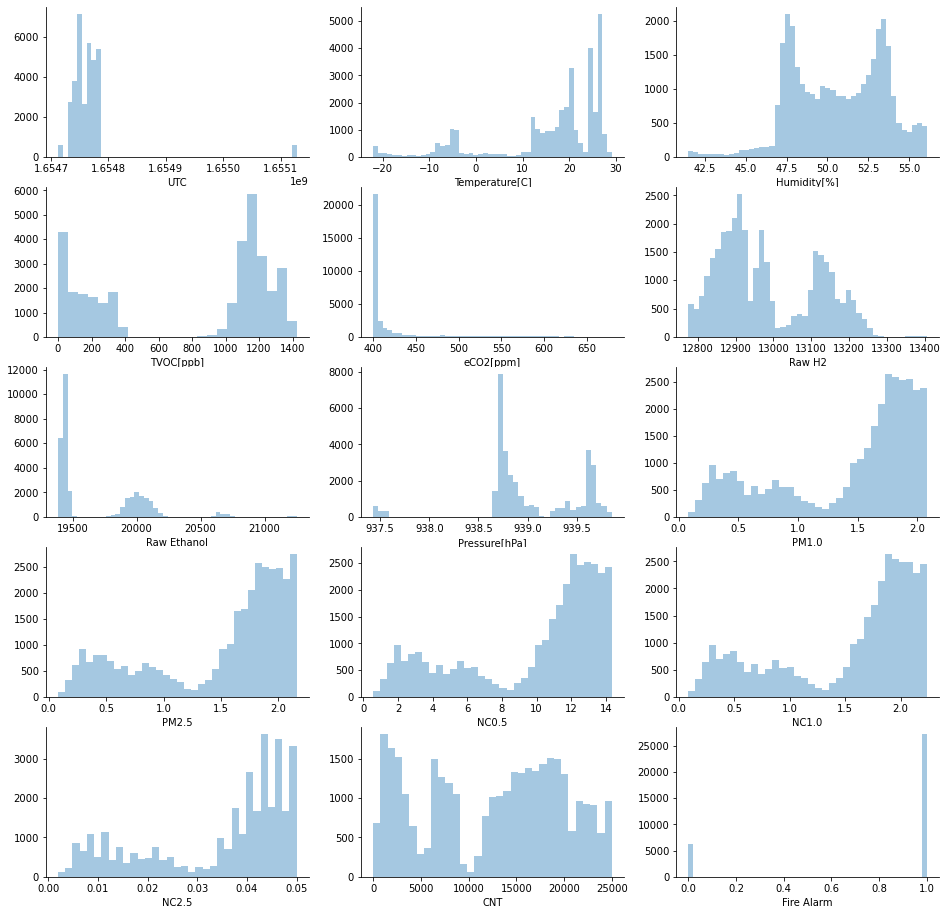

In [8]:
fig, ax = plt.subplots(figsize=(16,16))
for i in range(len(variables)):
    plt.subplot(5,3,i+1)
    x=data_array[variables[i]]
    sns.distplot(x, kde=False)
    sns.despine()

# Correlation

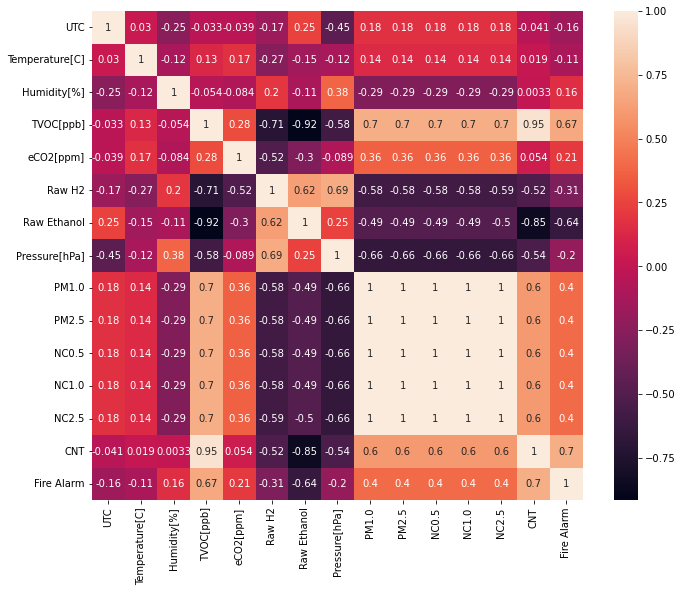

Fire Alarm        1.000000
CNT               0.695249
TVOC[ppb]         0.668883
NC0.5             0.404494
PM1.0             0.404491
PM2.5             0.404416
NC1.0             0.404395
NC2.5             0.401479
eCO2[ppm]         0.213977
Humidity[%]       0.159446
Temperature[C]   -0.107250
UTC              -0.155977
Pressure[hPa]    -0.199961
Raw H2           -0.305379
Raw Ethanol      -0.636847
Name: Fire Alarm, dtype: float64

In [9]:
fig, ax = plt.subplots(figsize=(11,9))
correl = data_array.corr()
sns.heatmap(correl,annot=True)
plt.show()
correl["Fire Alarm"].sort_values(ascending=False)

# Box-plot

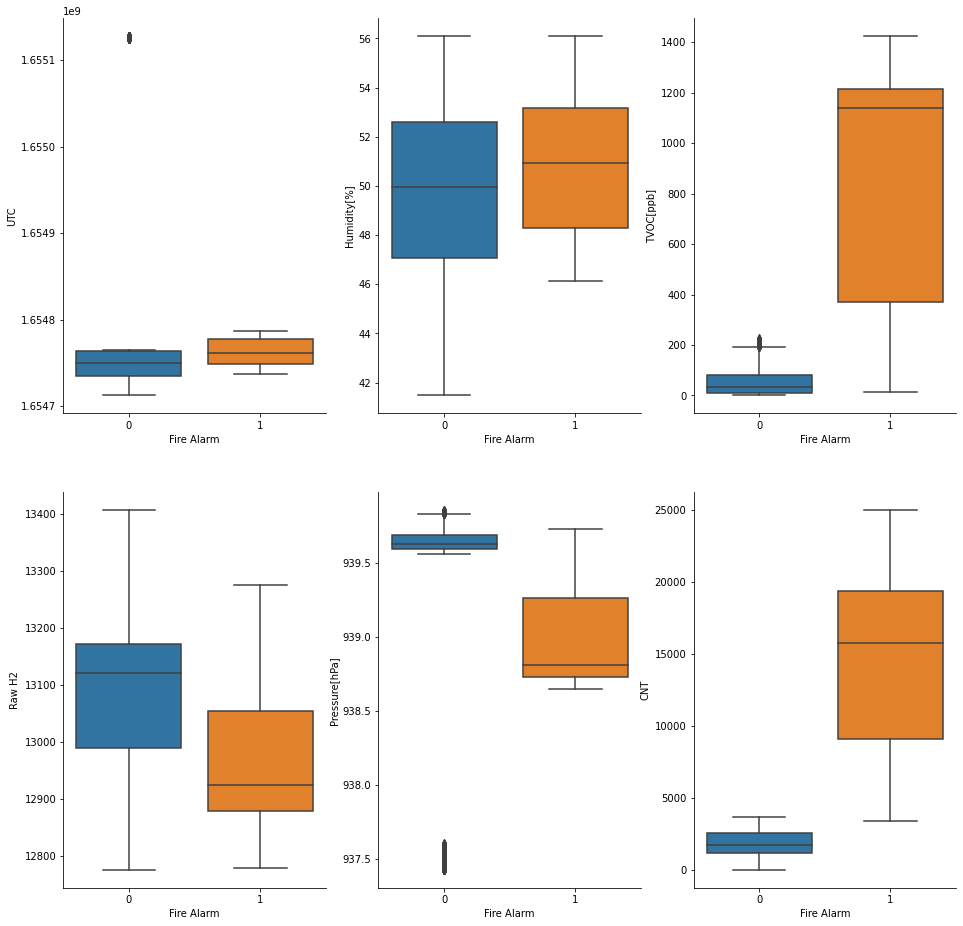

In [10]:
variables=["UTC", "Humidity[%]", "TVOC[ppb]", "Raw H2",  "Pressure[hPa]", "CNT"]
fig, ax = plt.subplots(figsize=(16,16))
for i in range(len(variables)):
    plt.subplot(2,3,i+1)
    var=data_array[variables[i]]
    sns.boxplot(x=data_array["Fire Alarm"], y = var)
    sns.despine()

# Decision Tree Classifier

In [11]:
data_without_y = data_array.copy()
del data_without_y["Fire Alarm"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data_without_y,     
                                                    data_array['Fire Alarm'].values, 
                                                    train_size=0.3)

In [13]:
tree_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)
tree_clf = tree_clf.fit(x_train, y_train)
y_pred=tree_clf.predict(x_test)
pd.DataFrame({"true":y_test, "pred":y_pred})

,true,pred
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
23406,1,1
23407,0,0
23408,1,1
23409,1,1


In [14]:
accuracy_score(y_test, y_pred)

0.9999145700738968

In [15]:
result=metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(result)

Confusion matrix:
[[ 4310     2]
 [    0 19099]]


## Show the tree 

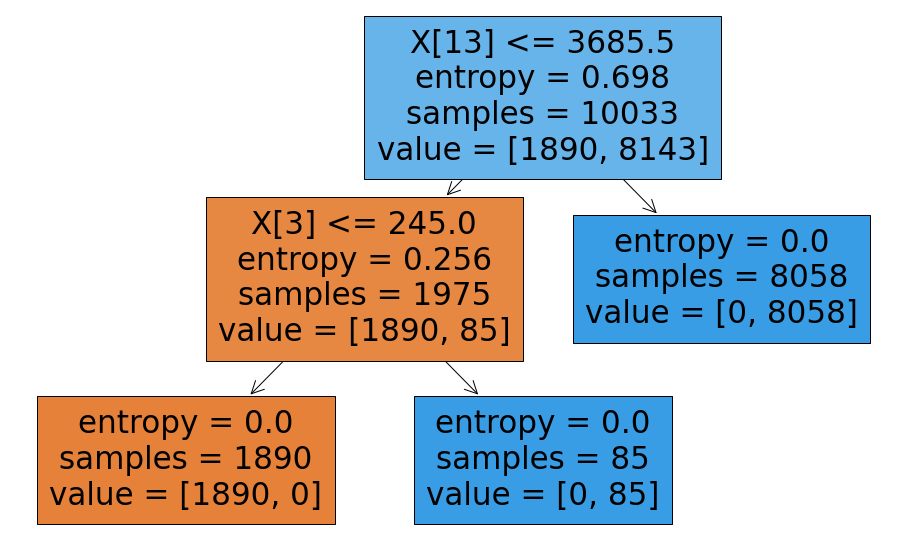

In [16]:
plt.figure(figsize=(16,10))
tree.plot_tree(tree_clf, filled = True)
plt.show()

# Random Forest Classifier

In [17]:
scores=[]
for i in range (2,20):
    forest_clf = RandomForestClassifier(n_estimators = i, criterion='entropy')
    forest_clf = forest_clf.fit(x_train, y_train) 
    y_pred=forest_clf.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    print(i, "  trees   =>   accuracy = ", accuracy_score(y_test, y_pred))

2   trees   =>   accuracy =  0.9994447054803297
3   trees   =>   accuracy =  1.0
4   trees   =>   accuracy =  1.0
5   trees   =>   accuracy =  1.0
6   trees   =>   accuracy =  1.0
7   trees   =>   accuracy =  1.0
8   trees   =>   accuracy =  1.0
9   trees   =>   accuracy =  1.0
10   trees   =>   accuracy =  1.0
11   trees   =>   accuracy =  0.9999572850369485
12   trees   =>   accuracy =  1.0
13   trees   =>   accuracy =  1.0
14   trees   =>   accuracy =  1.0
15   trees   =>   accuracy =  1.0
16   trees   =>   accuracy =  1.0
17   trees   =>   accuracy =  1.0
18   trees   =>   accuracy =  1.0
19   trees   =>   accuracy =  1.0


Text(0, 0.5, 'Accuracy')

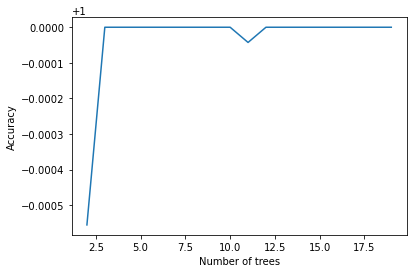

In [18]:
plt.plot(range(2,20),scores)
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

In [19]:
result=metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(result)

Confusion matrix:
[[ 4312     0]
 [    0 19099]]


# Scale

In [20]:
variables=["UTC", "Temperature[C]", "Humidity[%]", "TVOC[ppb]", "eCO2[ppm]", "Raw H2", "Raw Ethanol", "Pressure[hPa]", "PM1.0", "PM2.5", "NC0.5", "NC1.0", "NC2.5", "CNT"]
scaler = StandardScaler()
data_without_y[variables] = scaler.fit_transform(data_without_y[variables])
data_without_y

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
478,-0.621609,0.754027,-0.223219,-1.486356,-0.46422,-1.598553,0.285942,1.613402,-2.264430,-2.238350,-2.268853,-2.235135,-1.386239,-1.641414
482,-0.621532,0.756418,-0.357690,-1.484426,-0.46422,-1.583055,0.291627,1.581057,-2.145112,-2.123490,-2.162363,-2.111239,-0.751289,-1.640869
483,-0.621513,0.756996,-0.364768,-1.496002,-0.46422,-1.575305,0.297311,1.611381,-2.128067,-2.139898,-2.135122,-2.136654,-2.162289,-1.640732
496,-0.621263,0.764501,1.454133,-1.465133,-0.46422,-1.583055,0.254677,1.587122,-2.008748,-2.008630,-2.013773,-2.014347,-2.021189,-1.638960
497,-0.621244,0.765078,1.542601,-1.480568,-0.46422,-1.606303,0.234781,1.587122,-2.025794,-2.025039,-2.021202,-2.020700,-2.021189,-1.638824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60568,6.952497,-0.325809,-2.134127,-1.501790,-0.46422,3.136327,4.279359,-3.197984,0.803752,0.797230,0.802015,0.801895,0.800811,-1.204554
60569,6.952516,-0.325562,-2.144743,-1.501790,-0.46422,3.275816,4.393051,-3.185855,0.837843,0.830047,0.829257,0.830486,0.800811,-1.204417
60570,6.952535,-0.325232,-2.417224,-1.501790,-0.46422,3.244818,4.427158,-3.169682,0.854889,0.846456,0.851545,0.851135,0.871361,-1.204281
60571,6.952555,-0.324902,-2.771096,-1.501790,-0.46422,3.252567,4.427158,-3.157552,0.820798,0.830047,0.821827,0.822544,0.800811,-1.204145


# SVM

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data_without_y,     
                                                    data_array['Fire Alarm'].values, 
                                                    train_size=0.3)

In [22]:
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    svc_clf = SVC(kernel=i)
    svc_clf = svc_clf.fit(x_train, y_train)
    y_pred=svc_clf.predict(x_test)
    print('kernel type:', i)
    print('accuracy = ', accuracy_score(y_test, y_pred))

kernel type: linear
accuracy =  0.999615565332536
kernel type: poly
accuracy =  0.999615565332536
kernel type: rbf
accuracy =  0.999615565332536
kernel type: sigmoid
accuracy =  0.7880056383751228


## Grid Search for sigmoid

In [28]:
svc_param = {'C': [0.1, 1, 10, 100, 1000], 
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['sigmoid']}
svc_grid = GridSearchCV(SVC(), svc_param, cv=5, n_jobs=-1, verbose=True)
svc_grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['sigmoid']},
             verbose=True)

In [29]:
svc_grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}

In [30]:
svc_grid.best_score_

0.999900299102692

In [31]:
svc_grid_pred = svc_grid.predict(x_test)

In [32]:
result=metrics.confusion_matrix(y_test, svc_grid_pred)
print("Confusion matrix:")
print(result)

Confusion matrix:
[[ 4281     9]
 [    0 19121]]


# K Neighbors Classifier

In [33]:
x_train, x_test, y_train, y_test = train_test_split(data_without_y,     
                                                    data_array['Fire Alarm'].values, 
                                                    train_size=0.3)

In [34]:
scores=[]
for k in range(1,10):
    knc=KNeighborsClassifier(n_neighbors=k)
    knc.fit(x_train,y_train)
    y_pred=knc.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    print("k = ", k, "     =>   accuracy = ", accuracy_score(y_test, y_pred))

k =  1      =>   accuracy =  0.9997864251847423
k =  2      =>   accuracy =  0.9997864251847423
k =  3      =>   accuracy =  0.9997437102216906
k =  4      =>   accuracy =  0.9997864251847423
k =  5      =>   accuracy =  0.9997437102216906
k =  6      =>   accuracy =  0.9997437102216906
k =  7      =>   accuracy =  0.9997437102216906
k =  8      =>   accuracy =  0.9997437102216906
k =  9      =>   accuracy =  0.9997437102216906


Text(0, 0.5, 'Accuracy')

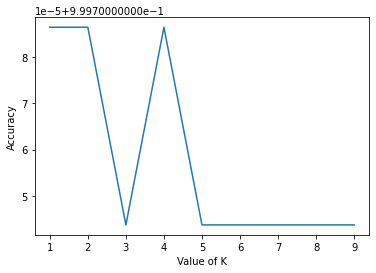

In [35]:
plt.plot(range(1,10),scores)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [36]:
result=metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(result)

Confusion matrix:
[[ 4360     6]
 [    0 19045]]


# Ada Boost Classifier

In [43]:
x_train, x_test, y_train, y_test = train_test_split(data_without_y,     
                                                    data_array['Fire Alarm'].values, 
                                                    train_size=0.3)

In [44]:
abc =AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [45]:
pd.DataFrame({"true":y_test, "pred":y_pred})

,true,pred
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
23406,1,1
23407,1,1
23408,1,1
23409,1,1


In [46]:
accuracy_score(y_test, y_pred)

0.9996582802955876

In [47]:
result=metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(result)

Confusion matrix:
[[ 4370     8]
 [    0 19033]]


In [48]:
result=metrics.classification_report(y_test, y_pred)
print("Classification report:")
print(result)

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4378
           1       1.00      1.00      1.00     19033

    accuracy                           1.00     23411
   macro avg       1.00      1.00      1.00     23411
weighted avg       1.00      1.00      1.00     23411

